## Churn Risk prediction

<b>Problem statement</b>

No business can thrive without it’s customers. On the flip side, customers leaving the business is a nightmare that every business owner dreads!

In fact, one of the key metrics to measure a business’ success is by measuring its customer churn rate - the lower the churn, the more loved the company is. 

Typically, every user of a product or a service is assigned a prediction value that estimates their state of churn at any given time. This value may be based on multiple factors such as the user’s demographic, their browsing behavior and historical purchase data, among other details.

This value factors in unique and proprietary predictions of how long a user will remain a customer and is updated every day for all users who have purchased at least one of the products/services. The values assigned are between 1 and 5.

<b>Task</b>

An up-and-coming startup is keen on reducing its customer churn and has hired you as a Machine Learning engineer for this task. As an expert, you are required to build a sophisticated Machine Learning model that predicts the churn score for a website based on multiple features.



<b>Dataset</b>

The dataset consists of parameters such as the user’s demographic and PII details, membership account details, duration and frequency of their visits to the website, reported grievances and feedback, and the like.

The benefits of practicing this problem by using Machine Learning techniques are as follows:

This challenge encourages you to apply your Machine Learning skills to build a model that predicts a user’s churn score.


## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.shape

(36992, 25)

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [7]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [8]:
type(df['Name'])

pandas.core.series.Series

In [9]:
df['Name']

0         Pattie Morrisey
1             Traci Peery
2         Merideth Mcmeen
3        Eufemia Cardwell
4            Meghan Kosak
               ...       
36987            Cuc Tarr
36988      Jenni Stronach
36989       Luciana Kinch
36990       Tawana Ardoin
36991    Verlene Beaulieu
Name: Name, Length: 36992, dtype: object

In [10]:
df[['Name', 'internet_option']]

,Name,internet_option
0,Pattie Morrisey,Wi-Fi
1,Traci Peery,Mobile_Data
2,Merideth Mcmeen,Wi-Fi
3,Eufemia Cardwell,Mobile_Data
4,Meghan Kosak,Mobile_Data
...,...,...
36987,Cuc Tarr,Wi-Fi
36988,Jenni Stronach,Wi-Fi
36989,Luciana Kinch,Wi-Fi
36990,Tawana Ardoin,Mobile_Data


In [11]:
df.internet_option.value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [12]:
df['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

### handle missing data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [14]:
df.region_category.mode()[0]

'Town'

In [15]:
df['preferred_offer_types'].mode()[0]

'Gift Vouchers/Coupons'

In [16]:
# filling categorical missing column
df['region_category']= df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types']= df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])

In [17]:
# handle numerical missing column
df['points_in_wallet']= df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [18]:
df.isnull().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [19]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


#### data analysis

In [20]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5


In [21]:
# !pip install pandas-profiling

In [22]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file(output_file="churn.html")

In [23]:
# highly correlated
df[['complaint_status', 'past_complaint']].head()

,complaint_status,past_complaint
0,Not Applicable,No
1,Solved,Yes
2,Solved in Follow-up,Yes
3,Unsolved,Yes
4,Solved,Yes


In [24]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [25]:
df.drop('complaint_status', axis=1, inplace=True)

In [26]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [28]:
df1 = df[['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']]

In [29]:
df1.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.750000,2
1,32,16,306.34,12838.38,686.882199,1
2,44,14,516.16,21027.00,500.690000,5
3,37,11,53.27,25239.56,567.660000,5
4,31,20,113.13,24483.66,663.060000,5


C:\Users\farha\AppData\Local\Temp\ipykernel_10736\2402587171.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\farha\AppData\Local\Temp\ipykernel_10736\2402587171.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])
C:\Users\farha\AppData\Local\Temp\ipykernel_

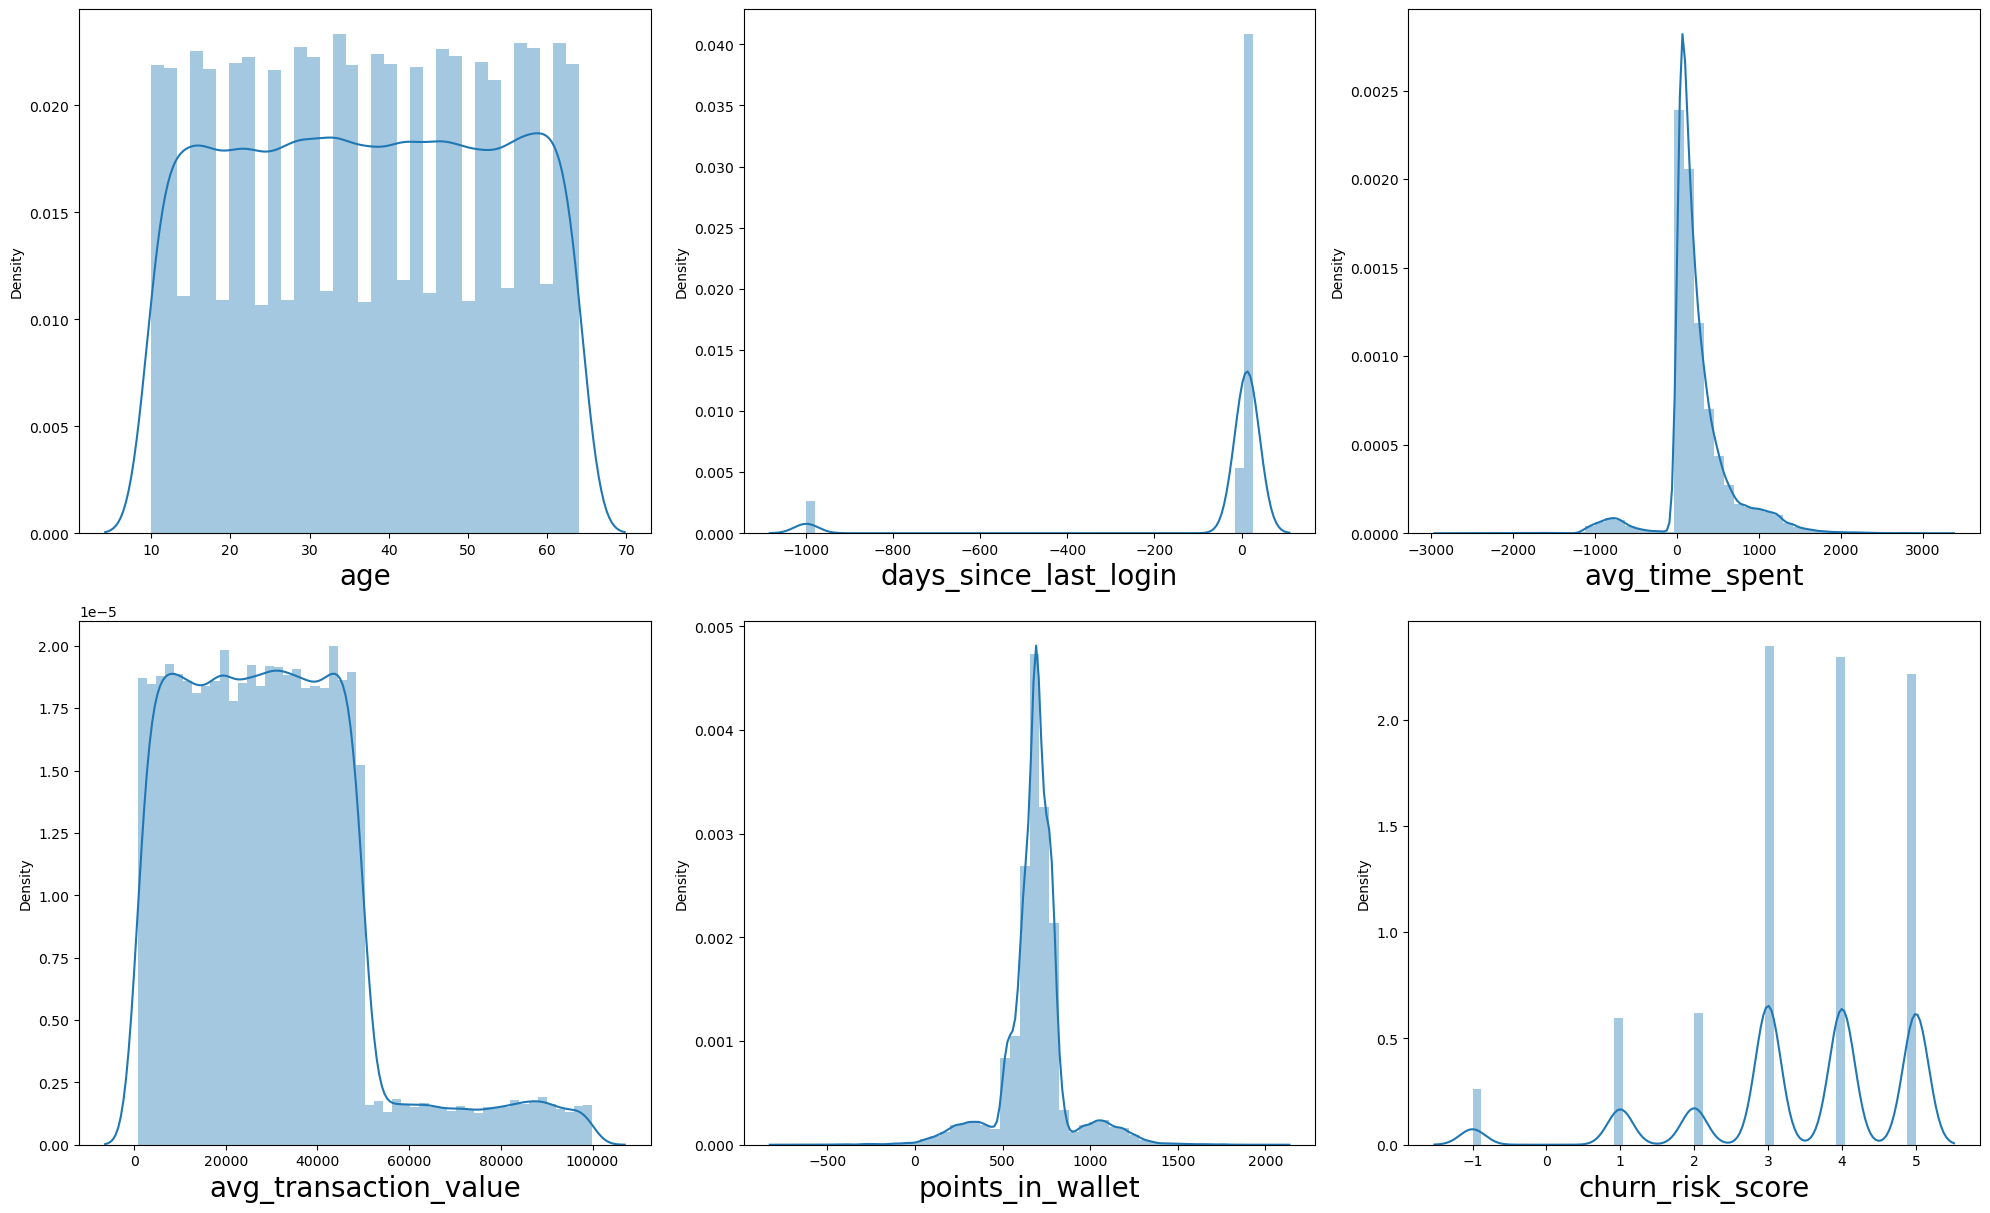

In [30]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in df1:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

#### exploratoray data analysis

In [31]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Poor Website,5


In [32]:
df[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [33]:
# import pandas as pd

# .dt is an accessor provided by pandas for datetime-like Series objects. It allows you to access various datetime components and properties of a Series containing datetime objects (e.g., date, time, day, month, year, etc.).

# When you have a Series containing datetime objects (e.g., timestamps), you can use .dt followed by a property or method to access specific attributes or perform operations on the datetime values.

# Here are some common uses of .dt:

# Accessing components of datetime objects:
# dt.year: Extracts the year from each datetime value.
# dt.month: Extracts the month from each datetime value.
# dt.day: Extracts the day from each datetime value.
# dt.hour: Extracts the hour from each datetime value.
# dt.minute: Extracts the minute from each datetime value.
# dt.second: Extracts the second from each datetime value.
# dt.microsecond: Extracts the microsecond from each datetime value.
# dt.date: Extracts the date (as a datetime.date object) from each datetime value.
# dt.time: Extracts the time (as a datetime.time object) from each datetime value.
# Performing datetime operations:
# dt.strftime(): Formats datetime values as strings using a specified format.
# dt.to_period(): Converts datetime values to Period objects.
# dt.to_pydatetime(): Converts datetime values to Python datetime.datetime objects.
# dt.tz_convert(): Converts datetime values from one timezone to another.
    
# # Create a sample DataFrame
# data = {'date': ['2024-01-01', '2024-01-02', '2024-01-03'],
#         'value': [100, 200, 300]}
# df = pd.DataFrame(data)

# # Convert the 'date' column to datetime data type
# df['date'] = pd.to_datetime(df['date'])

# # Now you can perform various operations on the date column
# # For example, extracting year, month, or day
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

# # You can also filter the DataFrame based on dates
# start_date = '2024-01-02'
# end_date = '2024-01-03'
# filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# print(df)
# print(filtered_df)


In [34]:
df['joining_day'] = pd.to_datetime(df['joining_date'], format="%Y/%m/%d").dt.day
df['joining_month'] = pd.to_datetime(df['joining_date'], format="%Y/%m/%d").dt.month
df['joining_year'] = pd.to_datetime(df['joining_date'], format="%Y/%m/%d").dt.year

In [35]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [36]:
df.drop(["joining_date"], axis=1, inplace=True)

In [37]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,17.0,781.750000,Yes,Yes,No,Products always in Stock,2,17,8,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,10.0,686.882199,Yes,No,Yes,Quality Customer Care,1,28,8,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,22.0,500.690000,No,Yes,Yes,Poor Website,5,11,11,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,6.0,567.660000,No,Yes,Yes,Poor Website,5,29,10,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,16.0,663.060000,No,Yes,Yes,Poor Website,5,12,9,2017


In [38]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_day', 'joining_month', 'joining_year'],
      dtype='object')

In [39]:
df[['last_visit_time']].head()

,last_visit_time
0,16:08:02
1,12:38:13
2,22:53:21
3,15:57:50
4,15:46:44


In [40]:
# import pandas as pd

# # Create a sample DataFrame
# data = {'time': ['09:00:00', '12:30:00', '15:45:00'],
#         'value': [100, 200, 300]}
# df = pd.DataFrame(data)

# # Convert the 'time' column to time data type
# df['time'] = pd.to_datetime(df['time']).dt.time

# # Now you can perform various operations on the time column
# # For example, extracting hour, minute, or second
# df['hour'] = df['time'].apply(lambda x: x.hour)
# df['minute'] = df['time'].apply(lambda x: x.minute)
# df['second'] = df['time'].apply(lambda x: x.second)

# print(df)


In [41]:
# extract hour, minutes and seconds

# Convert the 'last_visit_time' column to time data type
df['last_visit_time'] = pd.to_datetime(df['last_visit_time']).dt.time

# Now you can perform various operations on the time column
# For example, extracting hour, minute, or second
df['last_visit_time_hour'] = df['last_visit_time'].apply(lambda x: x.hour)
df['last_visit_time_minute'] = df['last_visit_time'].apply(lambda x: x.minute)
df['last_visit_time_second'] = df['last_visit_time'].apply(lambda x: x.second)


In [42]:
df.drop(['last_visit_time'], axis=1, inplace=True)


In [43]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minute,last_visit_time_second
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


In [44]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minute', 'last_visit_time_second'],
      dtype='object')

In [45]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference,past_complaint,feedback,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minute,last_visit_time_second
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,Yes,No,Products always in Stock,2,17,8,2017,16,8,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,No,Yes,Quality Customer Care,1,28,8,2017,12,38,13
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,11,11,2016,22,53,21
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,Yes,Yes,Poor Website,5,29,10,2016,15,57,50
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,Yes,Yes,Poor Website,5,12,9,2017,15,46,44


## handle categorical columns

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [47]:
# one hot encoding for all

In [48]:
df['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [49]:
gender = pd.get_dummies(df[['gender']], drop_first=True)
gender.head()

,gender_M,gender_Unknown
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [50]:
df['region_category'].value_counts()

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64

In [51]:
region = pd.get_dummies(df[['region_category']], drop_first=True)
region.head()

,region_category_Town,region_category_Village
0,0,1
1,0,0
2,1,0
3,0,0
4,0,0


In [52]:
df['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [53]:
membership = pd.get_dummies(df[['membership_category']], drop_first=True)
membership.head()

,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [54]:
df['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [55]:
referal = pd.get_dummies(df[['joined_through_referral']], drop_first=True)
referal.head()

,joined_through_referral_No,joined_through_referral_Yes
0,1,0
1,0,0
2,0,1
3,0,1
4,1,0


In [56]:
df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [57]:
offer = pd.get_dummies(df[['preferred_offer_types']], drop_first=True)
offer.head()

,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [58]:
df['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [59]:
medium = pd.get_dummies(df[['medium_of_operation']], drop_first=True)
medium.head()

,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [60]:
df['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [61]:
internet = pd.get_dummies(df[['internet_option']], drop_first=True)
internet.head()

,internet_option_Mobile_Data,internet_option_Wi-Fi
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [62]:
df['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [63]:
discount = pd.get_dummies(df[['used_special_discount']], drop_first=True)
discount.head()

,used_special_discount_Yes
0,1
1,1
2,0
3,0
4,0


In [64]:
df['offer_application_preference'].value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [65]:
application = pd.get_dummies(df[['offer_application_preference']], drop_first=True)
application.head()

,offer_application_preference_Yes
0,1
1,0
2,1
3,1
4,1


In [66]:
df['past_complaint'].value_counts()

No     18602
Yes    18390
Name: past_complaint, dtype: int64

In [67]:
complaint = pd.get_dummies(df[['past_complaint']], drop_first=True)
complaint.head()

,past_complaint_Yes
0,0
1,1
2,1
3,1
4,1


In [68]:
df['feedback'].value_counts()

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64

In [69]:
feedback = pd.get_dummies(df[['feedback']], drop_first=True)
feedback.head()

,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [70]:
# Concatenate dataframe -->

data_train = pd.concat([df, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)
data_train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,...,1,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,...,0,1,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,...,1,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,...,1,1,0,0,1,0,0,0,0,0


In [71]:
# drop unnecessary columns
data_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'feedback', 'churn_risk_score', 'joining_day',
       'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minute', 'last_visit_time_second', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referr

In [72]:
data_train.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

In [73]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [74]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          36992 non-null  int64  
 1   days_since_last_login                        36992 non-null  int64  
 2   avg_time_spent                               36992 non-null  float64
 3   avg_transaction_value                        36992 non-null  float64
 4   points_in_wallet                             36992 non-null  float64
 5   churn_risk_score                             36992 non-null  int64  
 6   joining_day                                  36992 non-null  int64  
 7   joining_month                                36992 non-null  int64  
 8   joining_year                                 36992 non-null  int64  
 9   last_visit_time_hour                         36992 non-null  int64  
 10

In [75]:
data_train.shape

(36992, 41)

### Test dataset

In [76]:
tf = pd.read_csv("test.csv")
tf.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [77]:
# preprocessing
# filling categorical missing column
tf['region_category']= tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types']= tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])

# handle numerical missing column
tf['points_in_wallet']= tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

# drop one column
tf.drop('complaint_status', axis=1, inplace=True)

# Exploratory data analysis
tf["joining_day"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.day
tf["joining_month"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.month
tf["joining_year"] = pd.to_datetime(tf.joining_date, format="%Y/%m/%d").dt.year

tf.drop(["joining_date"], axis=1, inplace=True)

# Extract hour, minutes and second
# tf[['last_visit_time_hour','last_visit_time_minutes','last_visit_time_seconds']] = tf['last_visit_time'].astype(str).str.split(':', expand=True).astype(int)
# Convert the 'last_visit_time' column to time data type
tf['last_visit_time'] = pd.to_datetime(tf['last_visit_time']).dt.time

# Now you can perform various operations on the time column
# For example, extracting hour, minute, or second
tf['last_visit_time_hour'] = tf['last_visit_time'].apply(lambda x: x.hour)
tf['last_visit_time_minute'] = tf['last_visit_time'].apply(lambda x: x.minute)
tf['last_visit_time_second'] = tf['last_visit_time'].apply(lambda x: x.second)

# Now we can drop Arrival_Time as it is of no use
tf.drop(["last_visit_time"], axis = 1, inplace = True)

# Handling categorical data
gender = pd.get_dummies(tf[['gender']], drop_first=True)
region = pd.get_dummies(tf[['region_category']], drop_first=True)
membership = pd.get_dummies(tf[['membership_category']], drop_first=True)
referal = pd.get_dummies(tf[['joined_through_referral']], drop_first=True)
offer = pd.get_dummies(tf[['preferred_offer_types']], drop_first=True)
medium = pd.get_dummies(tf[['medium_of_operation']], drop_first=True)
internet = pd.get_dummies(tf[['internet_option']], drop_first=True)
discount = pd.get_dummies(tf[['used_special_discount']], drop_first=True)
application = pd.get_dummies(tf[['offer_application_preference']], drop_first=True)
complaint = pd.get_dummies(tf[['past_complaint']], drop_first=True)
feedback = pd.get_dummies(tf[['feedback']], drop_first=True)

data_test = pd.concat([tf, gender, region, membership, referal, offer, medium, internet, discount, application, complaint, feedback ], axis = 1)

data_test.drop(["customer_id", "Name", "gender", "security_no", "region_category", "membership_category", "joined_through_referral", "referral_id", "preferred_offer_types", "medium_of_operation", "internet_option", "used_special_discount", "offer_application_preference", "past_complaint", "feedback", "avg_frequency_login_days" ], axis = 1, inplace = True)

data_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,0,0,0,1,0,0,0,0,0,0
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,0,0,0,0,1,0,0,0,0,0
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,0,1,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,0,1,0,0,0,0,0,0,1,0
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,1,1,0,0,1,0,0,0,0,0


In [78]:
data_test.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,50,12,386.26,40721.44,733.830000,2,11,2015,7,19,...,0,0,0,1,0,0,0,0,0,0
1,41,11,37.80,9644.40,726.000000,1,3,2016,22,21,...,0,0,0,0,1,0,0,0,0,0
2,31,18,215.36,3693.25,713.780000,3,3,2017,16,40,...,0,1,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,744.970000,18,8,2017,14,56,...,0,1,0,0,0,0,0,0,1,0
4,16,6,349.88,40675.86,299.048351,5,5,2015,2,57,...,1,1,0,0,1,0,0,0,0,0


In [79]:
data_test.shape

(19919, 40)

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [80]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [81]:
data_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score',
       'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
       'last_visit_time_minute', 'last_visit_time_second', 'gender_M',
       'gender_Unknown', 'region_category_Town', 'region_category_Village',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'used_special_discount_Yes', 'offer_application_preference_Yes',
    

In [82]:
# X = data_train.loc[:, ['age', 'days_since_last_login', 'avg_time_spent',
#        'avg_transaction_value', 'points_in_wallet',
#        'joining_day', 'joining_month', 'joining_year', 'last_visit_time_hour',
#        'last_visit_time_minutes', 'last_visit_time_seconds', 'gender_M',
#        'gender_Unknown', 'region_category_Town', 'region_category_Village',
#        'membership_category_Gold Membership',
#        'membership_category_No Membership',
#        'membership_category_Platinum Membership',
#        'membership_category_Premium Membership',
#        'membership_category_Silver Membership', 'joined_through_referral_No',
#        'joined_through_referral_Yes',
#        'preferred_offer_types_Gift Vouchers/Coupons',
#        'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
#        'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
#        'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
#        'used_special_discount_Yes', 'offer_application_preference_Yes',
#        'past_complaint_Yes', 'feedback_Poor Customer Service',
#        'feedback_Poor Product Quality', 'feedback_Poor Website',
#        'feedback_Products always in Stock', 'feedback_Quality Customer Care',
#        'feedback_Reasonable Price', 'feedback_Too many ads',
#        'feedback_User Friendly Website']]



In [83]:
y= data_train[['churn_risk_score']]
y.head()

,churn_risk_score
0,2
1,1
2,5
3,5
4,5


In [84]:

# specify input and output attributes
X = data_train.drop(columns=['churn_risk_score'], axis=1)
y = data_train['churn_risk_score']


In [88]:
X.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,17,8,2017,16,8,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,28,8,2017,12,38,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,11,11,2016,22,53,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,29,10,2016,15,57,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,12,9,2017,15,46,...,1,1,0,0,1,0,0,0,0,0


In [89]:
y.head()

0    2
1    1
2    5
3    5
4    5
Name: churn_risk_score, dtype: int64

In [90]:
# important feature using extratreeregressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [91]:
print(selection.feature_importances_)

[0.02412199 0.02089622 0.02492108 0.07692818 0.07146373 0.02412769
 0.02283112 0.01412691 0.02358126 0.02380013 0.02484729 0.009916
 0.00033708 0.01102364 0.00728084 0.03020239 0.13127064 0.03665219
 0.02988865 0.05451267 0.00853548 0.00906099 0.00974782 0.00978403
 0.00620582 0.00836071 0.00834395 0.00900072 0.00982861 0.00793473
 0.00721839 0.01149726 0.00822517 0.00850367 0.00687542 0.05087545
 0.05411076 0.04731133 0.00760956 0.04824044]


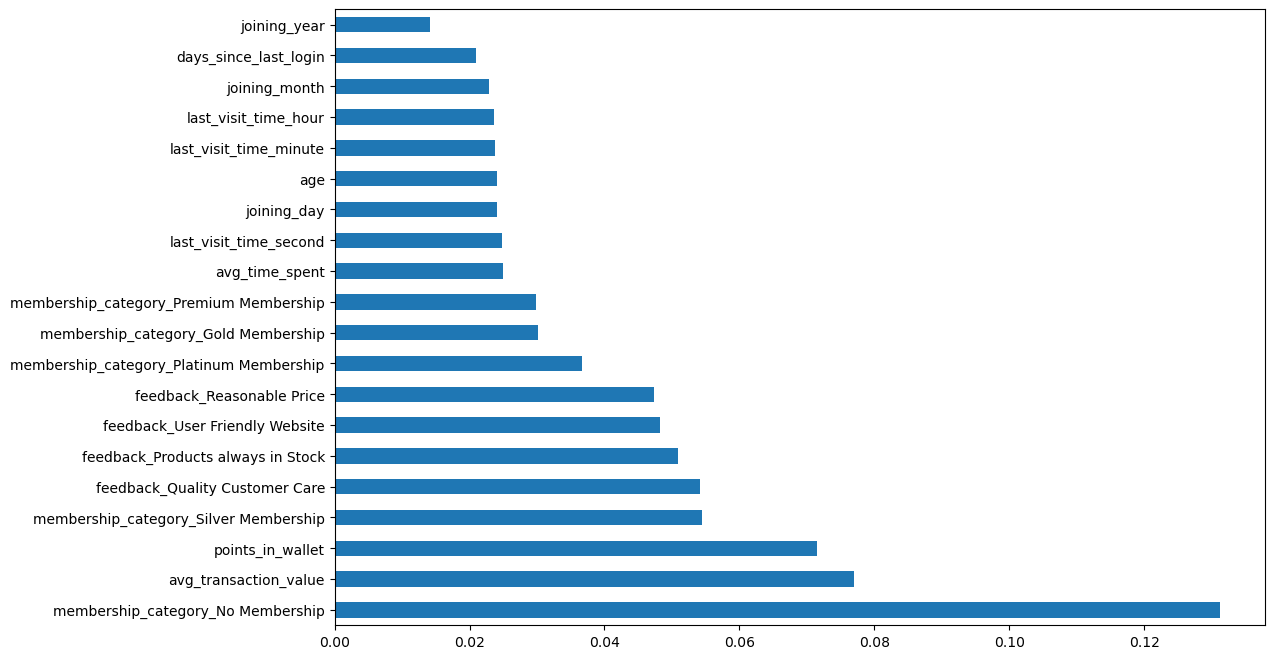

In [92]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#### model training

In [93]:
data_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,joining_day,joining_month,joining_year,last_visit_time_hour,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,781.750000,2,17,8,2017,16,...,1,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,686.882199,1,28,8,2017,12,...,0,1,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,500.690000,5,11,11,2016,22,...,1,1,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,567.660000,5,29,10,2016,15,...,1,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,663.060000,5,12,9,2017,15,...,1,1,0,0,1,0,0,0,0,0


In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [95]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,joining_day,joining_month,joining_year,last_visit_time_hour,last_visit_time_minute,...,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
3313,49,2,572.770000,19641.41,600.540000,26,3,2015,7,26,...,1,1,0,0,0,0,0,0,1,0
28260,42,16,1427.643434,48511.87,700.920000,2,10,2015,11,43,...,1,1,1,0,0,0,0,0,0,0
31412,10,-999,-779.419727,46612.57,744.650000,8,4,2016,2,41,...,1,1,0,0,0,0,0,0,1,0
6700,12,9,245.010000,95291.95,686.882199,23,2,2016,15,29,...,0,1,0,0,0,0,0,1,0,0
31958,28,14,308.770000,45564.89,716.280000,2,1,2017,10,59,...,0,1,0,0,1,0,0,0,0,0


In [96]:
x_train.shape

(29593, 40)

In [98]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [99]:
# checking training accuracy
print("training accuracy is : ", rf.score(x_train, y_train)*100)

training accuracy is :  100.0


In [100]:
# checking accuracy of test dataset
print("testing accuracy is : ", rf.score(x_test, y_test)*100)

testing accuracy is :  74.69928368698473


In [101]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [102]:
# checking accuracy of test dataset
print("testing accuracy is : ", model.score(x_test, y_test)*100)

testing accuracy is :  70.94201919178266


In [107]:
# XGBoost clasifier
# from xgboost import XGBClassifier
# xg = XGBClassifier(objective='binary:logistic')
# xg.fit(x_train, y_train)

from xgboost import XGBClassifier
import numpy as np
# Mapping the existing class labels to new integers starting from 0
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_encoded = np.array([class_mapping[label] for label in y_train])

# Fit the XGBoost classifier with the adjusted class labels
xg.fit(x_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  74.9695904852007


## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]
}

In [111]:
grid = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [114]:
grid.fit(x_train, y_train_encoded)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.746 total time=   2.2s
[CV 2/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.745 total time=   2.0s
[CV 3/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.754 total time=   2.1s
[CV 4/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.745 total time=   2.1s
[CV 5/5] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.750 total time=   1.9s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.743 total time=   2.2s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.739 total time=   1.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.745 total time=   2.3s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.745 total time=   1.9s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.750 total time=  

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.01],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=3)

In [118]:
grid.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01}

In [119]:
xg = XGBClassifier(n_estimators= 200, max_depth= 10, learning_rate= 0.01)
xg.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [121]:
# checking accuracy of test dataset
print("testing accuracy is : ", xg.score(x_train, y_train_encoded)*100)
print("testing accuracy is : ", xg.score(x_test, y_test)*100)

testing accuracy is :  82.35731422971648
testing accuracy is :  75.26692796323827


### save model

In [122]:
import pickle
file = 'xgboost_model.pkl'
pickle.dump(xg, open(file, 'wb'))

In [ ]:
# load_model = pickle.load(open(file, 'rb'))

In [ ]:
# y_prep = load_model.predict(x_test)

In [ ]:
# y_prep